In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/mmalik17/Rakamin-Personal-Project/main/Investigate-Business-Hotel-Using-Visualization/hotel_bookings_data.csv'
df = pd.read_csv(url)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
df.shape

(119390, 29)

# Task 1 - Data Pre-Processing

## Handle Missing Value

In [4]:
#Menghitung presentase nilai kosong
df.isnull().sum()/df.shape[0]

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_weekdays_nights          0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
city                              0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent                             0.136862
company                           0.943069
days_in_wai

Terdapat 4 kolom yang memiliki nilai kosong, yaitu kolom children, city agent, company. 

- Kolom company memiliki nilai null yang sangat banyak, yaitu 90% dari keseluruhan data, sehingga kolom tersebut lebih baik dihapus
- Kolom city dan children memiliki nilai null dibawah 1%, sehingga kolom tetap dipertahankan namun data yang kosong pada kolom tersebut sebaiknya dihapus
- Adapun kolom agent dilakukan imputasi dengan nilai rata-rata

In [5]:
#drop column company
df.drop(['company'], axis=1, inplace=True)
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status'],
      dtype='object')

In [6]:
#drop rows kosong di column city dan children
df.dropna(subset=['city','children'], inplace=True)

In [7]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_weekdays_nights              0
adults                                0
children                              0
babies                                0
meal                                  0
city                                  0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
booking_changes                       0
deposit_type                          0
agent                             16004
days_in_waiting_list                  0
customer_type                         0
adr                                   0


In [8]:
df['agent'].fillna(df['agent'].mean(), inplace = True)
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_weekdays_nights        118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

### Mengganti value yang tidak sesuai

In [10]:
df['meal'].value_counts()

Breakfast     91863
Dinner        14434
No Meal       10638
Undefined      1165
Full Board      798
Name: meal, dtype: int64

Undefined dianggap sebagai nilai null. 

In [11]:
df[df['meal']=='Undefined'].shape[0]/df.shape[0]

0.009798314521690861

Jumlah data dengan nilai meal = 'undefined' sangat kecil sehingga row dengan data tersebut dapat dihapus

In [12]:
#Mengubah nilai undefined menjadi data type None
df['meal']=np.where(df['meal']=='Undefined',None,df['meal'])
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0,3,No Deposit,86.545532,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0,4,No Deposit,86.545532,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,0,No Deposit,86.545532,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,0,No Deposit,304.000000,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,0,No Deposit,240.000000,0,Personal,98.0,0,1,Check-Out


In [13]:
df['meal'].value_counts()

Breakfast     91863
Dinner        14434
No Meal       10638
Full Board      798
Name: meal, dtype: int64

In [14]:
df.shape

(118898, 28)

In [15]:
#Menghapus kolom dengan nilai null
df.dropna(subset='meal', inplace=True)

In [16]:
df.shape

(117733, 28)

### Membuang data yang tidak diperlukan 

In [17]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status'],
      dtype='object')

In [18]:
df[['adults','children','babies']]

,adults,children,babies
0,2,0.0,0
1,2,0.0,0
2,1,0.0,0
3,1,0.0,0
4,2,0.0,0
...,...,...,...
119385,2,0.0,0
119386,3,0.0,0
119387,2,0.0,0
119388,2,0.0,0


Ketiga kolom tersebut sebaiknya disatukan menjadi satu kolom, yaitu guest

In [19]:
df['guest'] = df['adults'] + df['children'] + df['babies']
df = df.drop(['adults','children','babies'], axis = 1)

In [20]:
df['guest']

0         2.0
1         2.0
2         1.0
3         1.0
4         2.0
         ... 
119385    2.0
119386    3.0
119387    2.0
119388    2.0
119389    2.0
Name: guest, Length: 117733, dtype: float64

In [21]:
print(df.columns)
print(df.shape)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'meal', 'city', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'agent', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'guest'],
      dtype='object')
(117733, 26)


In [128]:
df['arrival_date_year'].value_counts()

2018    55852
2019    40192
2017    21689
Name: arrival_date_year, dtype: int64

# Task 2 - EDA

## Agregasi jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel

In [87]:
agg_monthly = df.groupby(['hotel','arrival_date_month']).agg({'arrival_date_year':'nunique','guest':'count'})
agg_monthly.rename(columns={'guest':'Jumlah_Pesanan'})

arrival_date_year  Jumlah_Pesanan
hotel        arrival_date_month                                   
City Hotel   April                               2            4965
             August                              2            7894
             December                            2            7591
             February                            2            4129
             January                             2            4354
             July                                2            8232
             June                                2            7476
             March                               2            3736
             May                                 2            6458
             November                            2            7400
             October                             3            8979
             September                           3            8088
Resort Hotel April                               2            2816
             August                              2            2984
             December                            2            3502
             February                            2            2332
             January                             2            2344
             July                                2            3535
             June                                2            3410
             March                               2            2010
             May                                 2            3108
             November                            2            3063
             October                             3            4830
             September                           3            4497

## Normalisasi data untuk bulan September dan Oktober

In [88]:
agg_monthly = agg_monthly.reset_index().rename(columns={
                'hotel':'Tipe_hotel','arrival_date_year':'Tahun',
                'arrival_date_month':'Bulan',
                'guest':'Jumlah_Pesanan'})
agg_monthly['Mean_Jumlah_Pesanan'] = agg_monthly['Jumlah_Pesanan']/agg_monthly['Tahun']
agg_monthly

,Tipe_hotel,Bulan,Tahun,Jumlah_Pesanan,Mean_Jumlah_Pesanan
0,City Hotel,April,2,4965,2482.5
1,City Hotel,August,2,7894,3947.0
2,City Hotel,December,2,7591,3795.5
3,City Hotel,February,2,4129,2064.5
4,City Hotel,January,2,4354,2177.0
5,City Hotel,July,2,8232,4116.0
6,City Hotel,June,2,7476,3738.0
7,City Hotel,March,2,3736,1868.0
8,City Hotel,May,2,6458,3229.0
9,City Hotel,November,2,7400,3700.0


## Pengurutan Data Berdasarkan Bulan

In [89]:
month_dict = {'January':1,'February':2,'March':3, 
              'April':4, 'May':5, 'June':6, 
              'July':7, 'August':8, 'September':9, 
              'October':10, 'November':11, 'December':12}
agg_monthly['Nomor_Bulan'] = agg_monthly['Bulan'].apply (lambda x : month_dict[x])

agg2 = agg_monthly.sort_values(['Tipe_hotel','Nomor_Bulan'],ascending=[True,True]).reset_index()
agg3 = agg2.drop(['index','Jumlah_Pesanan','Nomor_Bulan'], axis=1, inplace=True)
agg2

,Tipe_hotel,Bulan,Tahun,Mean_Jumlah_Pesanan
0,City Hotel,January,2,2177.0
1,City Hotel,February,2,2064.5
2,City Hotel,March,2,1868.0
3,City Hotel,April,2,2482.5
4,City Hotel,May,2,3229.0
5,City Hotel,June,2,3738.0
6,City Hotel,July,2,4116.0
7,City Hotel,August,2,3947.0
8,City Hotel,September,3,2696.0
9,City Hotel,October,3,2993.0


## Draw Plot

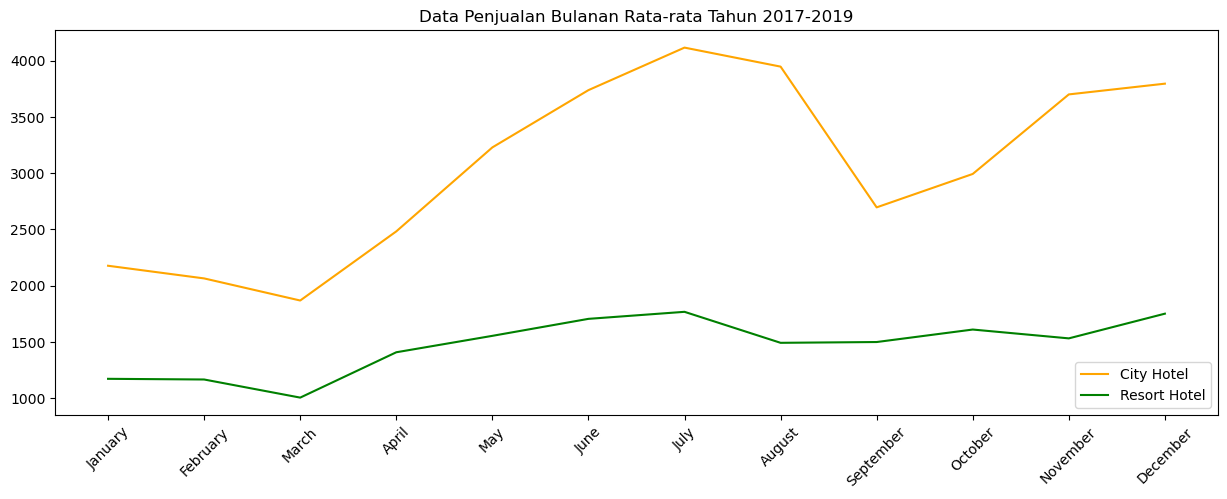

In [129]:
mycolors = ['orange','green']
plt.figure(figsize=(15,5))
hotel_type = agg2['Tipe_hotel'].unique()
for i, c in enumerate(hotel_type):
    plt.plot('Bulan','Mean_Jumlah_Pesanan',data=agg2.loc[agg2.Tipe_hotel==c,:], color=mycolors[i], label=agg2)
    plt.title('Data Penjualan Bulanan Rata-rata Tahun 2017-2019')
    plt.xticks(rotation=45)
    plt.legend(['City Hotel','Resort Hotel'], loc='lower right')

## Insight

Penjualan hotel berada pada puncaknya di bulan Juni, Juli dan Desember. Hal ini bertepatan dengan bulan libur akhir sekolah di pertengahan tahun dan libur Natal di akhir tahun. Tren tersebut kemudian menurun hingga penjualan mencapai titik terendah dua bulan setelah titik tertingginya. Jenis hotel yang paling mengalami lonjakan signifikan adalah hotel bertipe city hotel

# Task 3 - Analisa Durasi Menginap

1. Buatlah kolom baru yang berisi total durasi menginap. (Hint: Perhatikan kolom-kolom yang memuat informasi tentang durasi menginap)
2. Kelompokkan nilai-nilai dari kolom baru pada langkah sebelumnya supaya lebih signifikan (Hint: Perhatikan persebaran datanya)
3. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)
4. Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)
5. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh dari durasi menginap terhadap tingkat pembatalan pemesanan hotel)

In [132]:
#Pembuatan kolom berisi total durasi menginap
df['stay_duration']=df['stays_in_weekend_nights']+df['stays_in_weekdays_nights']

In [214]:
#Pengelompokna nilai-nilai dari kolom durasi menginap
def stay_category(x):
    if x<3:
        category = '0-2 nights (Short Stay)'
    elif x<5:
        category = '3-4 nights (Medium Stay)'
    elif x<8:
        category = '5-7 nights (Long Stay)'
    else:
        category = '>7 night (Overweek Stay)'
    return category

# df['stay_duration_category'] = df['stay_duration'].apply(lambda x: stay_category(x(df['stay_duration'])))
df['stay_duration_category'] = df['stay_duration'].apply(lambda x: stay_category(x))
df['stay_duration_category']

0          0-2 nights (Short Stay)
1          0-2 nights (Short Stay)
2          0-2 nights (Short Stay)
3          0-2 nights (Short Stay)
4          0-2 nights (Short Stay)
                    ...           
119385      5-7 nights (Long Stay)
119386      5-7 nights (Long Stay)
119387      5-7 nights (Long Stay)
119388      5-7 nights (Long Stay)
119389    >7 night (Overweek Stay)
Name: stay_duration_category, Length: 117733, dtype: object

## tabel agregat perbandingan jumlah pemesanan yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel 

In [215]:
#tabel agregat perbandingan jumlah pemesanan yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel 
df_agg_cancel = df.groupby(['hotel','stay_duration_category']).agg({'guest':'count','is_canceled':'sum'})
df_agg_cancel = df_agg_cancel.reset_index().rename(columns={'guest':'order_count','is_canceled':'cancel_count'})
df_agg_cancel

,hotel,stay_duration_category,order_count,cancel_count
0,City Hotel,0-2 nights (Short Stay),35019,14550
1,City Hotel,3-4 nights (Medium Stay),33922,14325
2,City Hotel,5-7 nights (Long Stay),9114,3526
3,City Hotel,>7 night (Overweek Stay),1247,675
4,Resort Hotel,0-2 nights (Short Stay),13834,2850
5,Resort Hotel,3-4 nights (Medium Stay),9811,3168
6,Resort Hotel,5-7 nights (Long Stay),10877,3587
7,Resort Hotel,>7 night (Overweek Stay),3909,1186


## Plot rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel 

<Figure size 2500x500 with 0 Axes>

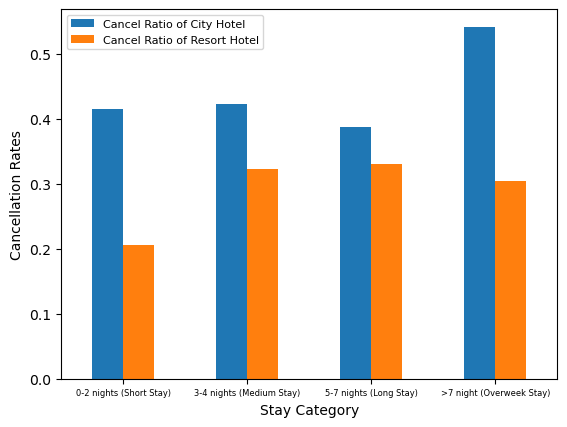

In [232]:
df_agg_cancel['cancel_ratio'] = df_agg_cancel['cancel_count']/df_agg_cancel['order_count']

stay_type = df_agg_cancel['stay_duration_category'].unique()
ratio_city =df_agg_cancel[df_agg_cancel['hotel']=='City Hotel']['cancel_ratio'].to_list()
ratio_resort =df_agg_cancel[df_agg_cancel['hotel']=='Resort Hotel']['cancel_ratio'].to_list()

df_ratio = pd.DataFrame({
    'Stay Category':stay_type,
    'Cancel Ratio of City Hotel':ratio_city, 
    'Cancel Ratio of Resort Hotel':ratio_resort
})

plt.figure(figsize=(25,5))
df_ratio.plot(x="Stay Category", y=["Cancel Ratio of City Hotel", "Cancel Ratio of Resort Hotel"], kind="bar")
plt.xticks(rotation = 0, fontsize=6)
plt.ylabel('Cancellation Rates')
plt.legend(fontsize=8)
plt.show()

## Insight

Pada hotel bertipe city_hotel: 
- cancel ratio yang memiliki perbedaan signifikan adalah untuk durasi menginap lebih dari tujuh malam, yaitu ratio pada kategori tersebut jauh lebih besar dibanding kategori lainnya
- untuk hotel dengan durasi menginap 0-7 malam, nilai cancel ratio tidak jauh berbeda satu sama lain

Pada hotel bertipe resort_hotel: 
- cancel ratio yang memiliki perbedaan signifikan adalah untuk durasi menginap 0-2 malam, yaitu ratio pada kategori tersebut jauh lebih kecil dibanding kategori lainnya
- untuk hotel dengan durasi menginap lebih dari 2 malam, nilai cancel ratio tidak jauh berbeda satu sama lain

# Task 4 - Analisa Pengaruh Leadtime Terhadap Cancel Ratio

##  Kategorisasi dari kolom jarak waktu pemesanan

count    117733.000000
mean        104.477606
std         107.167057
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

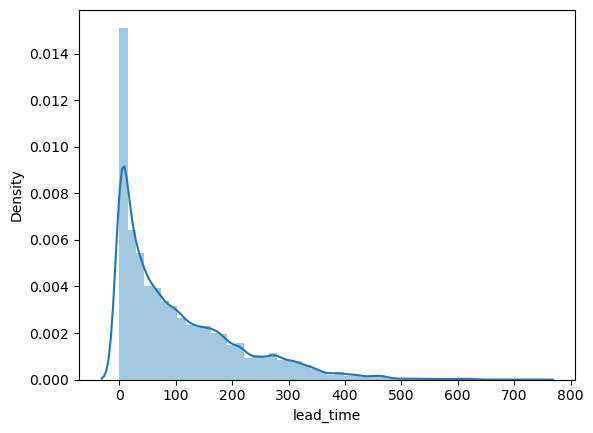

In [239]:
#melihat persebaran data jarak waktu pemesanan
print(df['lead_time'].describe())

import seaborn as sns
sns.distplot(df['lead_time'])

In [243]:
#pembuatan kategori
def lead_time_cat(x):
    if x<8:
        return '0-7 hari'
    elif x<31:
        return '8-30 hari'
    elif x<91:
        return '1-3 bulan'
    elif x<241:
        return '4-8 bulan'
    elif x<366:
        return '9-12 bulan'
    elif x>365:
        return 'lebih dari setahun'

df['kategori jarak waktu pemesanan'] = df['lead_time'].apply(lambda x: lead_time_cat(x))
df['kategori jarak waktu pemesanan'].value_counts()

4-8 bulan             35946
1-3 bulan             29151
0-7 hari              19372
8-30 hari             18620
9-12 bulan            11496
lebih dari setahun     3148
Name: kategori jarak waktu pemesanan, dtype: int64

## Tabel agregat jumlah pemesanan hotel yang dibatalkan terhadap jarak waktu pemesanan untuk setiap jenis hotel

In [253]:
agg_leadtime = df.groupby(['hotel','kategori jarak waktu pemesanan']).agg({'guest':'count','is_canceled':'sum'})
agg_leadtime = agg_leadtime.reset_index().rename(columns={'guest':'order_count','is_canceled':'cancel_count'})
agg_leadtime['cancel_ratio'] = agg_leadtime['cancel_count']/agg_leadtime['order_count']
agg_leadtime

,hotel,kategori jarak waktu pemesanan,order_count,cancel_count,cancel_ratio
0,City Hotel,0-7 hari,10795,1308,0.121167
1,City Hotel,1-3 bulan,20797,8300,0.399096
2,City Hotel,4-8 bulan,24308,11805,0.485643
3,City Hotel,8-30 hari,12553,3879,0.309010
4,City Hotel,9-12 bulan,8145,5861,0.719583
5,City Hotel,lebih dari setahun,2704,1923,0.711169
6,Resort Hotel,0-7 hari,8577,565,0.065874
7,Resort Hotel,1-3 bulan,8354,2717,0.325233
8,Resort Hotel,4-8 bulan,11638,4516,0.388039
9,Resort Hotel,8-30 hari,6067,1344,0.221526


## Plot rasio pembatalan pesanan terhadap jarak waktu pemesanan untuk setiap tipe hotel

<Figure size 2500x500 with 0 Axes>

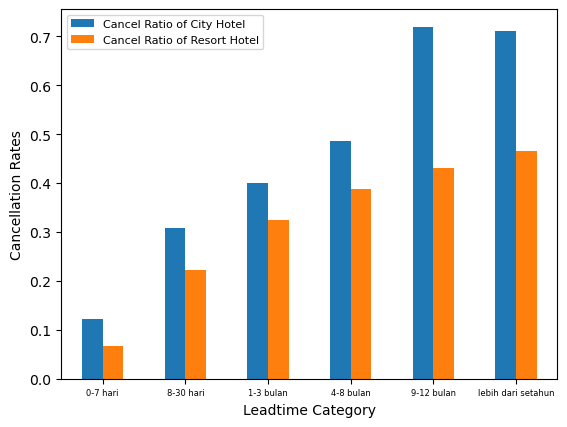

In [258]:
#mengurutkan category 
cat_order = {'0-7 hari':1,'8-30 hari':2,'1-3 bulan':3, 
            '4-8 bulan':4,'9-12 bulan':5,'lebih dari setahun':6}
agg_leadtime['order_category'] = agg_leadtime['kategori jarak waktu pemesanan'].apply (lambda x : cat_order[x])
agg_leadtime = agg_leadtime.sort_values(['hotel','order_category'], ascending=[True,True])
agg_leadtime

lead_type = agg_leadtime['kategori jarak waktu pemesanan'].unique()
leadtime_city = agg_leadtime[agg_leadtime['hotel']=='City Hotel']['cancel_ratio'].to_list()
leadtime_resort = agg_leadtime[agg_leadtime['hotel']=='Resort Hotel']['cancel_ratio'].to_list()

# agg_monthly.sort_values(['Tipe_hotel','Nomor_Bulan'],ascending=[True,True]).reset_index()

df_leadtime = pd.DataFrame({
    'Leadtime Category':lead_type,
    'Cancel Ratio of City Hotel':leadtime_city, 
    'Cancel Ratio of Resort Hotel':leadtime_resort
})

plt.figure(figsize=(25,5))
df_leadtime.plot(x="Leadtime Category", y=["Cancel Ratio of City Hotel", "Cancel Ratio of Resort Hotel"], kind="bar")
plt.xticks(rotation = 0, fontsize=6)
plt.ylabel('Cancellation Rates')
plt.legend(fontsize=8)
plt.show()

## Interpretasi

Secara keseluruhan, nilai cancel ratio pada City Hotel lebih tinggi dibanding Resort Hotel di kategori leadtime manapun. Selisih cancel ratio terbesar berada pada leadtime category 9-12 bulan

Pola cancel ratio pada kedua tipe hotel juga serupa, yaitu cancel ratio sangat kecil pada kategori lead time 0-7 hari, lalu semakin membesar seiring bertambahnya lead time

In [ ]:
#Mengubah nilai stay_duration = 0 menjadi 1
df['stay_duration']=np.where(df['stay_duration']==0,1,df['stay_duration'])
df_agg_cancel = df.groupby(['hotel','stay_duration']).agg({'is_canceled':'sum'})
df_agg_cancel = df_agg_cancel.reset_index().rename(columns={'is_canceled':'cancel_count'})
df_agg_cancel